Sky Kapoor and Christopher Compierchio

This program will solve the 1D shallow water system using the FTCS scheme.

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Constants, as given in the lab manual

L = 1
J = 50
dx = L/J
dt = 0.01
g = 9.81

H = 0.01
A = 0.002
sigma = 0.05
miu = 0.5

x = np.arange(0, L+dx, dx)

u = u_new = np.zeros(J+1, float)
eta = eta_new = np.zeros(J+1, float)

# Initial conditions
avg = np.mean(A*np.exp(-(x-miu)**2/sigma**2))
eta = H + A*np.exp(-(x-miu)**2/sigma**2) - avg

t = 0
t_final = 5

In [4]:
# Create the loop, consider x = 0 and x = L, and then apply FTCS

# t = 0 (initial condition)
eta0 = np.copy(eta)


while t <= t_final:
    for j in range(J+1):
        if j == 0:
            u_new[j] = 0
            eta_new[j] = eta[j] - (u[j+1]*eta[j+1] - u[j]*eta[j])*dt/dx
        elif j == J:
            u_new[j] = 0
            eta_new[j] = eta[j] - (u[j]*eta[j] - u[j-1]*eta[j-1])*dt/dx
        else:
            u_new[j] = u[j] - ((u[j+1]**2 - u[j-1]**2)/2 + g*(eta[j+1]-eta[j-1]))*dt/(2*dx)
            eta_new[j] = eta[j] - (u[j+1]*eta[j+1] - u[j-1]*eta[j-1])*dt/(2*dx)

# t = 1
    if t - 1 <= 1e-5:
        eta1 = np.copy(eta)

# t = 4
    if t - 4 <= 1e-5:
        eta4 = np.copy(eta)
    
    u = np.copy(u_new)
    eta = np.copy(eta_new)
    t += dt

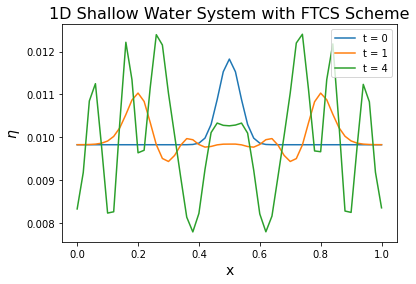

In [5]:
#plot results
plt.plot(x, eta0, label = 't = 0')
plt.plot(x, eta1, label = 't = 1')
plt.plot(x, eta4, label = 't = 4')
plt.title("1D Shallow Water System with FTCS Scheme", fontsize = 16)
plt.xlabel('x', fontsize = 14)
plt.ylabel('$\eta$', fontsize = 14)
plt.legend()